# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Adzi Bilal Maulana Hidayatulloh
- **Email:** adzibilal02@gmail.com
- **ID Dicoding:** adzibilal

## Menentukan Pertanyaan Bisnis

- Apakah ada perbedaan kualitas udara (PM2.5 dan PM10) antara musim panas dan musim dingin?
- Apakah curah hujan (RAIN) mempengaruhi tingkat polusi udara (PM2.5 dan PM10)?
- Bagaimana pengaruh arah angin (wd) dan kecepatan angin (WSPM) terhadap tingkat polutan udara (PM2.5) di berbagai stasiun?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Data Manipulation and Wrangling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For statistical analysis and modeling
from scipy import stats
import statsmodels.api as sm

# Handling date and time
import datetime as dt

# Checking for missing data
import missingno as msno

## Data Wrangling

### Gathering Data

In [ ]:
# Load data for each station
aotizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/adzibilal/air-quality-dataset/refs/heads/main/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping_df = pd.read_csv("https://raw.githubusercontent.com/adzibilal/air-quality-dataset/refs/heads/main/PRSA_Data_Changping_20130301-20170228.csv")
dingling_df = pd.read_csv("https://raw.githubusercontent.com/adzibilal/air-quality-dataset/refs/heads/main/PRSA_Data_Dingling_20130301-20170228.csv")
dongsi_df = pd.read_csv("https://raw.githubusercontent.com/adzibilal/air-quality-dataset/refs/heads/main/PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan_df = pd.read_csv("https://raw.githubusercontent.com/adzibilal/air-quality-dataset/refs/heads/main/PRSA_Data_Guanyuan_20130301-20170228.csv")
huairou_df = pd.read_csv("https://raw.githubusercontent.com/adzibilal/air-quality-dataset/refs/heads/main/PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("https://raw.githubusercontent.com/adzibilal/air-quality-dataset/refs/heads/main/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shunyi_df = pd.read_csv("https://raw.githubusercontent.com/adzibilal/air-quality-dataset/refs/heads/main/PRSA_Data_Shunyi_20130301-20170228.csv")
tiantan_df = pd.read_csv("https://raw.githubusercontent.com/adzibilal/air-quality-dataset/refs/heads/main/PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu_df = pd.read_csv("https://raw.githubusercontent.com/adzibilal/air-quality-dataset/refs/heads/main/PRSA_Data_Wanliu_20130301-20170228.csv")
wanshouxigong_df = pd.read_csv("https://raw.githubusercontent.com/adzibilal/air-quality-dataset/refs/heads/main/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

# Display the first few rows of one of the datasets as an example
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Menggabungkan Semua Data stasiun menjadi satu Data Frame karena semua struktur datanya sama agar memudahkan dalam proses **Assessing Data** dan **Cleaning Data**

In [ ]:
# Tambahkan kolom 'station' untuk masing-masing dataframe hal ini di lakukan untuk mengantisipasi bercampurnya data stasiun yang value nya tidak ada pada saat cleaning data.
aotizhongxin_df['station'] = 'Aotizhongxin'
changping_df['station'] = 'Changping'
dingling_df['station'] = 'Dingling'
dongsi_df['station'] = 'Dongsi'
guanyuan_df['station'] = 'Guanyuan'
huairou_df['station'] = 'Huairou'
nongzhanguan_df['station'] = 'Nongzhanguan'
shunyi_df['station'] = 'Shunyi'
tiantan_df['station'] = 'Tiantan'
wanliu_df['station'] = 'Wanliu'
wanshouxigong_df['station'] = 'Wanshouxigong'

# Gabungkan semua dataframe
all_stations_df = pd.concat([aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df,
                             huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df,
                             wanshouxigong_df], ignore_index=True)

# Tampilkan data gabungan
all_stations_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Mengambil data dari dataset Air Quality Dataset csv (dari github adzibilal)
- Menggabungkan semua data stasiun jadi satu DataFrame

### Assessing Data

Menilai tabel **all_stations_df**

In [ ]:
all_stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385704 entries, 0 to 385703
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       385704 non-null  int64  
 1   year     385704 non-null  int64  
 2   month    385704 non-null  int64  
 3   day      385704 non-null  int64  
 4   hour     385704 non-null  int64  
 5   PM2.5    377611 non-null  float64
 6   PM10     379636 non-null  float64
 7   SO2      377190 non-null  float64
 8   NO2      374256 non-null  float64
 9   CO       366404 non-null  float64
 10  O3       373156 non-null  float64
 11  TEMP     385357 non-null  float64
 12  PRES     385361 non-null  float64
 13  DEWP     385352 non-null  float64
 14  RAIN     385357 non-null  float64
 15  wd       384041 non-null  object 
 16  WSPM     385428 non-null  float64
 17  station  385704 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 53.0+ MB


Memeriksa apakah ada data yang missing value

In [ ]:
all_stations_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8093
PM10,6068
SO2,8514
NO2,11448
CO,19300


Dari hasil pemeriksaan ada banyak missing value pada data, hal ini akan saya selesaikan pada sesi cleaning data, lalu selanjutnya saya akan memeriksa apakah ada data yang duplikat.

In [ ]:
print("Jumlah duplikasi: ", all_stations_df.duplicated().sum())

Jumlah duplikasi:  0


pada tabel **all_stations_df** ternyata tidak ada duplikasi data

In [ ]:
all_stations_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,385704.000000,385704.000000,385704.000000,385704.000000,385704.000000,377611.000000,379636.000000,377190.000000,374256.000000,366404.000000,373156.000000,385357.000000,385361.000000,385352.000000,385357.000000,385428.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.423495,103.299903,15.873407,50.157694,1222.203065,57.342587,13.509397,1010.921197,2.479953,0.064478,1.764821
std,10122.118037,1.177198,3.448708,8.800103,6.922196,80.630013,91.193917,21.690542,34.962395,1155.222874,56.628540,11.448625,10.489755,13.794799,0.819382,1.248778
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,35.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.400000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,81.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.600000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,143.000000,20.000000,70.000000,1500.000000,82.000000,23.200000,1019.200000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,411.000000,290.000000,10000.000000,1071.000000,41.400000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
- Melihat kondisi data di tabel `all_stations_df`
- Data yang Hilang:
 - Kolom PM2.5 memiliki 8.093 nilai yang hilang.
 - Kolom PM10 memiliki 6.068 nilai yang hilang.
 - Kolom SO2 memiliki 8.514 nilai yang hilang.
 - Kolom NO2 memiliki 11.448 nilai yang hilang.
 - Kolom CO memiliki jumlah nilai hilang yang paling besar, yaitu 19.300.
 - Kolom O3 juga memiliki jumlah nilai hilang yang cukup signifikan, yaitu 12.548.
 - Untuk variabel meteorologi seperti TEMP, PRES, DEWP, dan RAIN, jumlah nilai yang hilang relatif kecil dibandingkan polutan udara, masing-masing hanya beberapa ratus.
 - Kolom wd (arah angin) memiliki 1.663 nilai hilang, sementara WSPM (kecepatan angin) memiliki 276 nilai yang hilang.
- Tidak ada Data Ganda pada `all_stations_df`

### Cleaning Data

In [ ]:
print("Missing Value Data \n", all_stations_df.isna().sum())

Missing Value Data 
 No             0
year           0
month          0
day            0
hour           0
PM2.5       8093
PM10        6068
SO2         8514
NO2        11448
CO         19300
O3         12548
TEMP         347
PRES         343
DEWP         352
RAIN         347
wd          1663
WSPM         276
station        0
dtype: int64


Pada bagian cleaning data ini saya akan memeriksa jumlah persentase data yang *missing value*

In [ ]:
missing_values_percentage = (all_stations_df.isna().sum() / len(all_stations_df)) * 100
print(missing_values_percentage)

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.098241
PM10       1.573227
SO2        2.207392
NO2        2.968079
CO         5.003837
O3         3.253272
TEMP       0.089965
PRES       0.088928
DEWP       0.091262
RAIN       0.089965
wd         0.431160
WSPM       0.071557
station    0.000000
dtype: float64


Karena dilihat dari jumlah datanya lumayan banyak jadi saya memutuskan untuk **Mengisi missing values untuk kolom numerik dengan rata-rata** dan **Mengisi missing values untuk kolom kategorikal dengan modus**

In [ ]:
# Mengisi missing values untuk kolom numerik dengan rata-rata
all_stations_df['PM2.5'].fillna(all_stations_df['PM2.5'].mean(), inplace=True)
all_stations_df['PM10'].fillna(all_stations_df['PM10'].mean(), inplace=True)
all_stations_df['SO2'].fillna(all_stations_df['SO2'].mean(), inplace=True)
all_stations_df['NO2'].fillna(all_stations_df['NO2'].mean(), inplace=True)
all_stations_df['CO'].fillna(all_stations_df['CO'].mean(), inplace=True)
all_stations_df['O3'].fillna(all_stations_df['O3'].mean(), inplace=True)
all_stations_df['TEMP'].fillna(all_stations_df['TEMP'].mean(), inplace=True)
all_stations_df['PRES'].fillna(all_stations_df['PRES'].mean(), inplace=True)
all_stations_df['DEWP'].fillna(all_stations_df['DEWP'].mean(), inplace=True)
all_stations_df['RAIN'].fillna(all_stations_df['RAIN'].mean(), inplace=True)
all_stations_df['WSPM'].fillna(all_stations_df['WSPM'].mean(), inplace=True)

# Mengisi missing values untuk kolom kategorikal dengan modus
all_stations_df['wd'].fillna(all_stations_df['wd'].mode()[0], inplace=True)

# Cek kembali missing values
print(all_stations_df.isna().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Nah sekarang sudah tidak ada lagi data yang missing value, dan data siap untuk di exploarsi dan di visualisasikan

**Insight:**
- Melihat persentasi Missing Value pada tabel all_stations_df
- Membersihkan Missing Value pada tabel all_stations_df
- Mengisi Nilai yang Hilang untuk Kolom Numerik:

  - Untuk kolom-kolom dengan tipe data numerik, seperti **PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, dan WSPM**, nilai yang hilang diisi dengan **rata-rata (mean)** dari kolom yang bersangkutan.
    - Metode ini bertujuan untuk mempertahankan jumlah data sebanyak mungkin tanpa menghapus baris yang memiliki nilai hilang, sehingga analisis tetap bisa dilakukan dengan dataset yang lengkap.

- Mengisi Nilai yang Hilang untuk Kolom Kategorikal:

  - Untuk kolom wd yang berisi data kategorikal (arah angin), nilai yang hilang diisi dengan modus, yaitu nilai yang paling sering muncul di kolom tersebut.
      - Hal ini dilakukan karena modus merupakan representasi yang paling umum dari data kategorikal, sehingga dapat mengisi nilai hilang dengan pilihan yang masuk akal berdasarkan distribusi data.

- Memastikan Tidak Ada Lagi Missing Values:

    - Setelah proses imputasi selesai, dilakukan pengecekan ulang terhadap jumlah missing values menggunakan all_stations_df.isna().sum(). Hal ini bertujuan untuk memastikan bahwa semua nilai hilang telah diisi dan tidak ada lagi missing values yang tersisa dalam dataset.

## Exploratory Data Analysis (EDA)

### Explore `all_stations_df`

In [ ]:
# Menampilkan statistika deskriptif
descriptive_stats = all_stations_df.describe()
print("Statistika Deskriptif:")
print(descriptive_stats)

Statistika Deskriptif:
                  No           year          month            day  \
count  385704.000000  385704.000000  385704.000000  385704.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.118037       1.177198       3.448708       8.800103   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  385704.000000  385704.000000  385704.000000  385704.000000   
mean       11.500000      79.423495     103.299903      15.873407   
std         6.922196      79.779620      90.473727      21.449808   
min         0.000000       2.000000       2.000000       0.285600   
25%       

In [ ]:
# Menampilkan nilai unik untuk kolom 'station'
unique_stations = all_stations_df['station'].unique()
print("\nStasiun Unik:")
print(unique_stations)


Stasiun Unik:
['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Huairou'
 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong']


In [ ]:
# Melihat distribusi nilai PM2.5 berdasarkan stasiun
pm25_by_station = all_stations_df.groupby('station')['PM2.5'].describe()
print("\nDistribusi PM2.5 Berdasarkan Stasiun:")
print(pm25_by_station)


Distribusi PM2.5 Berdasarkan Stasiun:
                 count       mean        std  min   25%   50%    75%    max
station                                                                    
Aotizhongxin   35064.0  82.685234  81.046816  3.0  23.0  61.0  112.0  898.0
Changping      35064.0  71.283481  71.534634  2.0  18.0  48.0   98.0  882.0
Dingling       35064.0  66.287954  71.487849  3.0  14.0  42.0   91.0  881.0
Dongsi         35064.0  86.049473  85.649800  3.0  23.0  63.0  117.0  737.0
Guanyuan       35064.0  82.871711  80.220737  2.0  24.0  61.0  113.0  680.0
Huairou        35064.0  69.892642  70.268375  2.0  18.0  48.0   96.0  762.0
Nongzhanguan   35064.0  84.741500  85.452698  2.0  23.0  60.0  114.0  844.0
Shunyi         35064.0  79.489829  80.167174  2.0  20.0  57.0  109.0  941.0
Tiantan        35064.0  82.111981  80.137245  3.0  23.0  60.0  112.0  821.0
Wanliu         35064.0  83.331670  81.459212  2.0  24.0  60.0  115.0  957.0
Wanshouxigong  35064.0  84.912966  85.121978  3.0

In [ ]:
# Melihat distribusi nilai PM10 berdasarkan stasiun
pm10_by_station = all_stations_df.groupby('station')['PM10'].describe()
print("\nDistribusi PM10 Berdasarkan Stasiun:")
print(pm10_by_station)


Distribusi PM10 Berdasarkan Stasiun:
                 count        mean        std  min   25%   50%    75%    max
station                                                                     
Aotizhongxin   35064.0  109.921958  94.247864  2.0  39.0  89.0  153.0  984.0
Changping      35064.0   94.801313  82.753695  2.0  34.0  74.0  129.0  999.0
Dingling       35064.0   84.105668  78.838652  2.0  26.0  62.0  116.0  905.0
Dongsi         35064.0  110.225763  97.446183  2.0  38.0  88.0  150.0  955.0
Guanyuan       35064.0  108.953279  91.013952  2.0  41.0  90.0  148.0  999.0
Huairou        35064.0   91.744554  82.379923  2.0  29.0  71.0  128.0  993.0
Nongzhanguan   35064.0  108.919680  94.743196  2.0  38.0  87.0  148.0  995.0
Shunyi         35064.0   98.808338  88.446172  2.0  32.0  79.0  137.0  999.0
Tiantan        35064.0  106.311509  88.934122  2.0  41.0  87.0  143.0  988.0
Wanliu         35064.0  110.406587  92.420726  2.0  40.0  89.0  152.0  951.0
Wanshouxigong  35064.0  112.100284  96

In [ ]:
# Menghitung median dan kuartil untuk PM2.5
pm25_median = all_stations_df['PM2.5'].median()
pm25_quartiles = all_stations_df['PM2.5'].quantile([0.25, 0.5, 0.75])
print(f"\nMedian PM2.5: {pm25_median}")
print(f"Kuartil PM2.5: {pm25_quartiles}")


Median PM2.5: 56.0
Kuartil PM2.5: 0.25     21.0
0.50     56.0
0.75    109.0
Name: PM2.5, dtype: float64


In [ ]:
# Menghitung median dan kuartil untuk PM10
pm10_median = all_stations_df['PM10'].median()
pm10_quartiles = all_stations_df['PM10'].quantile([0.25, 0.5, 0.75])
print(f"\nMedian PM10: {pm10_median}")
print(f"Kuartil PM10: {pm10_quartiles}")


Median PM10: 82.0
Kuartil PM10: 0.25     36.0
0.50     82.0
0.75    142.0
Name: PM10, dtype: float64


In [ ]:
# Menampilkan rata-rata nilai polutan berdasarkan bulan
average_pollutants_by_month = all_stations_df.groupby('month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
print("\nRata-rata Polutan Berdasarkan Bulan:")
print(average_pollutants_by_month)


Rata-rata Polutan Berdasarkan Bulan:
            PM2.5        PM10        SO2        NO2           CO         O3
month                                                                      
1       92.883043  112.356408  31.109479  61.176382  1813.197506  28.404841
2       87.195078  102.276741  27.864541  50.105985  1364.015652  41.489213
3       94.119766  134.246080  27.864874  59.623547  1293.785748  51.057391
4       72.617321  114.985178  14.361491  46.772418   848.084028  70.061462
5       63.206223  104.884917  14.200831  42.203450   818.512921  90.972873
6       69.003032   85.411706   8.299942  38.848495   998.234539  93.442982
7       71.975126   83.566809   5.976315  35.654309   922.281885  93.447904
8       53.747902   70.426972   5.005479  36.053916   841.290843  87.032068
9       61.539336   78.614897   6.685661  45.286539   935.280617  55.216106
10      90.859244  111.116503   9.014530  58.842859  1151.346039  31.083131
11      92.555789  117.063853  15.281930  61.30951

In [ ]:
# Melihat frekuensi nilai untuk kolom 'station'
station_counts = all_stations_df['station'].value_counts()
print("\nFrekuensi Stasiun:")
print(station_counts)


Frekuensi Stasiun:
station
Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: count, dtype: int64


In [ ]:
# Melihat frekuensi untuk kolom 'month' untuk memahami distribusi data berdasarkan bulan
month_counts = all_stations_df['month'].value_counts().sort_index()
print("\nFrekuensi Data Berdasarkan Bulan:")
print(month_counts)


Frekuensi Data Berdasarkan Bulan:
month
1     32736
2     29832
3     32736
4     31680
5     32736
6     31680
7     32736
8     32736
9     31680
10    32736
11    31680
12    32736
Name: count, dtype: int64


In [ ]:
# Melihat distribusi nilai PM2.5 berdasarkan stasiun
pm25_summary = all_stations_df.groupby('station')['PM2.5'].agg(['mean', 'std', 'min', 'max'])
print("\nRangkuman PM2.5 Berdasarkan Stasiun:")
print(pm25_summary)


Rangkuman PM2.5 Berdasarkan Stasiun:
                    mean        std  min    max
station                                        
Aotizhongxin   82.685234  81.046816  3.0  898.0
Changping      71.283481  71.534634  2.0  882.0
Dingling       66.287954  71.487849  3.0  881.0
Dongsi         86.049473  85.649800  3.0  737.0
Guanyuan       82.871711  80.220737  2.0  680.0
Huairou        69.892642  70.268375  2.0  762.0
Nongzhanguan   84.741500  85.452698  2.0  844.0
Shunyi         79.489829  80.167174  2.0  941.0
Tiantan        82.111981  80.137245  3.0  821.0
Wanliu         83.331670  81.459212  2.0  957.0
Wanshouxigong  84.912966  85.121978  3.0  999.0


In [ ]:
# Melihat distribusi nilai PM10 berdasarkan stasiun
pm10_summary = all_stations_df.groupby('station')['PM10'].agg(['mean', 'std', 'min', 'max'])
print("\nRangkuman PM10 Berdasarkan Stasiun:")
print(pm10_summary)


Rangkuman PM10 Berdasarkan Stasiun:
                     mean        std  min    max
station                                         
Aotizhongxin   109.921958  94.247864  2.0  984.0
Changping       94.801313  82.753695  2.0  999.0
Dingling        84.105668  78.838652  2.0  905.0
Dongsi         110.225763  97.446183  2.0  955.0
Guanyuan       108.953279  91.013952  2.0  999.0
Huairou         91.744554  82.379923  2.0  993.0
Nongzhanguan   108.919680  94.743196  2.0  995.0
Shunyi          98.808338  88.446172  2.0  999.0
Tiantan        106.311509  88.934122  2.0  988.0
Wanliu         110.406587  92.420726  2.0  951.0
Wanshouxigong  112.100284  96.922887  2.0  961.0


In [ ]:
# Menampilkan statistik untuk suhu (TEMP)
temp_stats = all_stations_df['TEMP'].agg(['mean', 'std', 'min', 'max'])
print("\nStatistik Suhu (TEMP):")
print(temp_stats)


Statistik Suhu (TEMP):
mean    13.509397
std     11.443474
min    -19.900000
max     41.400000
Name: TEMP, dtype: float64


In [ ]:
# Menampilkan statistik untuk kelembaban (DEWP)
dewp_stats = all_stations_df['DEWP'].agg(['mean', 'std', 'min', 'max'])
print("\nStatistik Kelembaban (DEWP):")
print(dewp_stats)


Statistik Kelembaban (DEWP):
mean     2.479953
std     13.788503
min    -43.400000
max     29.100000
Name: DEWP, dtype: float64


**Insight:**

1. Statistika Deskriptif:

    Data terdiri dari 385.704 baris dengan informasi terkait polutan udara, tanggal, suhu, tekanan, dan lainnya.

    Rata-rata nilai **PM2.5 sebesar 79.42**, dan **PM10 sebesar 103.30**, dengan nilai maksimum masing-masing mencapai 999.

    Rata-rata nilai polutan lain seperti SO2, NO2, CO, dan O3 juga disertakan, dengan nilai rata-rata **SO2 sebesar 15.87**, **NO2 sebesar 50.16**, **CO sebesar 1222.20, dan O3 sebesar 57.34.**


2. Stasiun Unik:

    **Terdapat 11 stasiun pemantau polusi di dataset**, seperti 'Aotizhongxin', 'Changping', 'Dongsi', dan lainnya.


3. Distribusi PM2.5 Berdasarkan Stasiun:

    **Nilai PM2.5 bervariasi di setiap stasiun**, dengan stasiun **'Dongsi' memiliki rata-rata PM2.5 tertinggi (86.05)** dan stasiun **'Dingling' memiliki rata-rata terendah (66.29).**

4. Distribusi PM10 Berdasarkan Stasiun:

    Sama halnya dengan PM2.5, distribusi **PM10 bervariasi di setiap stasiun**, dengan stasiun **'Wanshouxigong' memiliki rata-rata PM10 tertinggi (112.10)** dan stasiun **'Dingling' memiliki rata-rata terendah (84.11).**

5. Median dan Kuartil:

    Median PM2.5 adalah 56.0 dengan kuartil pertama (25%) 21.0, kuartil kedua (50%) 56.0, dan kuartil ketiga (75%) 109.0.

    Median PM10 adalah 82.0 dengan kuartil pertama 36.0, kuartil kedua 82.0, dan kuartil ketiga 142.0.

6. Rata-rata Polutan Berdasarkan Bulan:

    Menampilkan rata-rata nilai polutan PM2.5, PM10, SO2, NO2, CO, dan O3 per bulan.
    
    Hasil ini **memberi gambaran yang lebih jelas mengenai distribusi polutan di berbagai stasiun serta tren berdasarkan waktu (seperti median, kuartil, dan perbandingan bulan).**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada perbedaan kualitas udara (PM2.5 dan PM10) antara musim panas dan musim dingin?

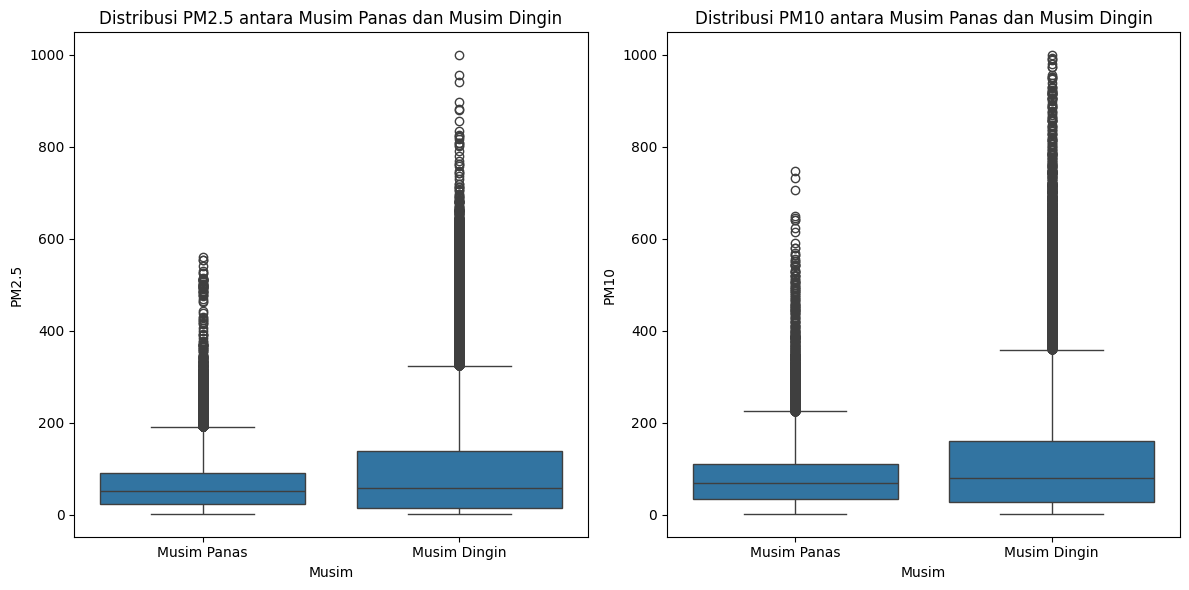

In [ ]:
# Menyiapkan data: Mengklasifikasikan bulan menjadi musim panas dan musim dingin
# Misalkan musim panas adalah bulan 6 (Juni), 7 (Juli), 8 (Agustus) dan musim dingin adalah bulan 12 (Desember), 1 (Januari), 2 (Februari)
def classify_season(month):
    if month in [6, 7, 8]:  # Bulan Musim Panas
        return 'Musim Panas'
    elif month in [12, 1, 2]:  # Bulan Musim Dingin
        return 'Musim Dingin'
    else:
        return 'Lainnya'

# Menambahkan kolom musim ke DataFrame
all_stations_df['season'] = all_stations_df['month'].apply(classify_season)

# Menghapus data yang tidak perlu
filtered_df = all_stations_df[all_stations_df['season'].isin(['Musim Panas', 'Musim Dingin'])]

# Membuat visualisasi
plt.figure(figsize=(12, 6))

# Box plot untuk PM2.5
plt.subplot(1, 2, 1)
sns.boxplot(x='season', y='PM2.5', data=filtered_df)
plt.title('Distribusi PM2.5 antara Musim Panas dan Musim Dingin')
plt.xlabel('Musim')
plt.ylabel('PM2.5')

# Box plot untuk PM10
plt.subplot(1, 2, 2)
sns.boxplot(x='season', y='PM10', data=filtered_df)
plt.title('Distribusi PM10 antara Musim Panas dan Musim Dingin')
plt.xlabel('Musim')
plt.ylabel('PM10')

plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah curah hujan (RAIN) mempengaruhi tingkat polusi udara (PM2.5 dan PM10)?

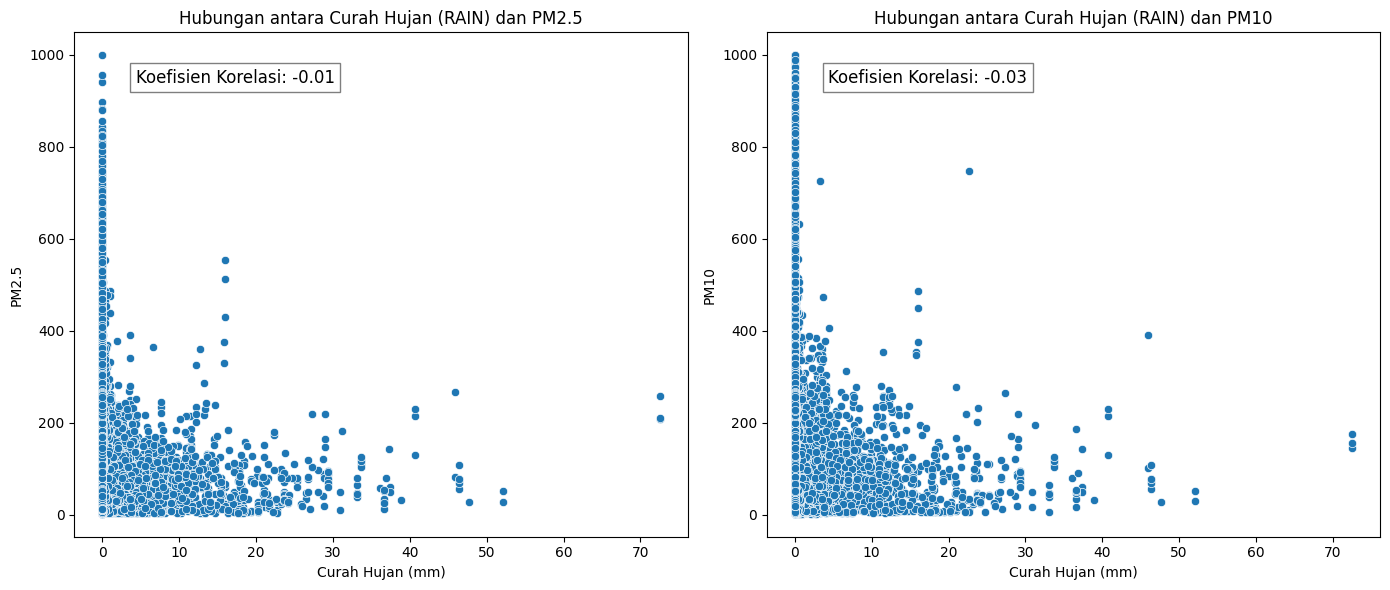

In [ ]:
# Membuat scatter plot untuk melihat hubungan antara RAIN dan PM2.5
plt.figure(figsize=(14, 6))

# Scatter plot untuk PM2.5
plt.subplot(1, 2, 1)
sns.scatterplot(x='RAIN', y='PM2.5', data=all_stations_df)
plt.title('Hubungan antara Curah Hujan (RAIN) dan PM2.5')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('PM2.5')

# Menampilkan koefisien korelasi
corr_pm25 = all_stations_df['RAIN'].corr(all_stations_df['PM2.5'])
plt.text(0.1, 0.9, f'Koefisien Korelasi: {corr_pm25:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Scatter plot untuk PM10
plt.subplot(1, 2, 2)
sns.scatterplot(x='RAIN', y='PM10', data=all_stations_df)
plt.title('Hubungan antara Curah Hujan (RAIN) dan PM10')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('PM10')

# Menampilkan koefisien korelasi
corr_pm10 = all_stations_df['RAIN'].corr(all_stations_df['PM10'])
plt.text(0.1, 0.9, f'Koefisien Korelasi: {corr_pm10:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana pengaruh arah angin (wd) dan kecepatan angin (WSPM) terhadap tingkat polutan udara (PM2.5) di berbagai stasiun?

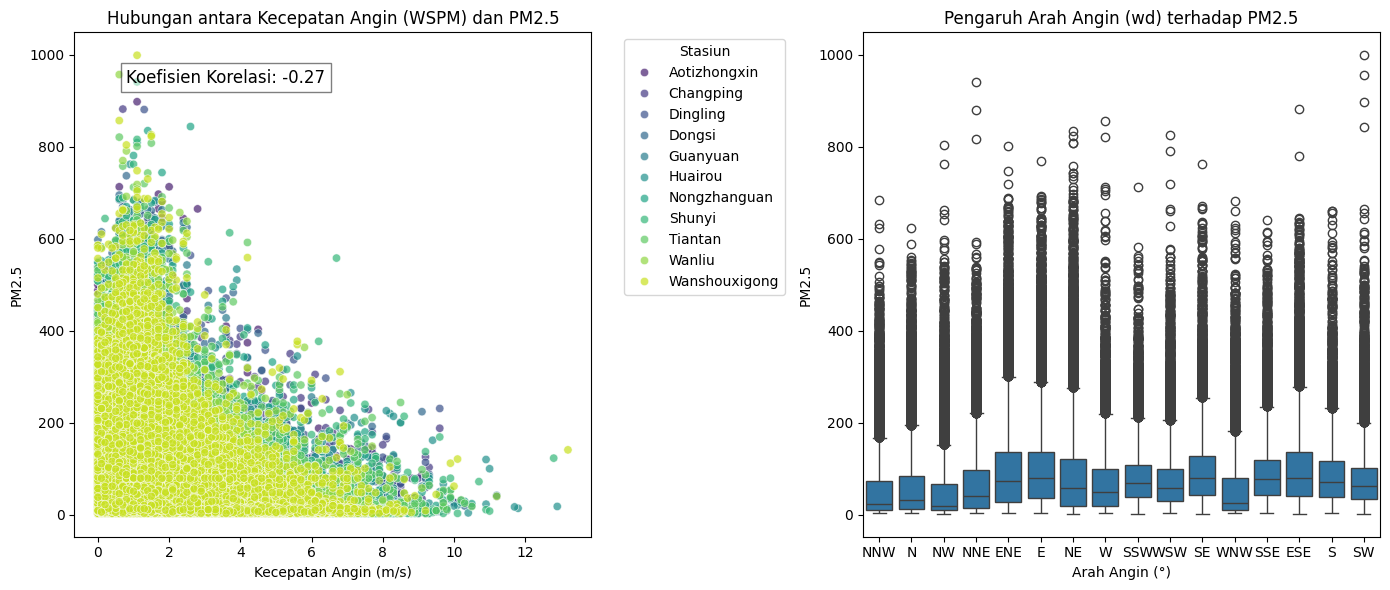

In [ ]:
# Membuat scatter plot untuk melihat hubungan antara WSPM dan PM2.5
plt.figure(figsize=(14, 6))

# Scatter plot untuk WSPM
plt.subplot(1, 2, 1)
sns.scatterplot(x='WSPM', y='PM2.5', hue='station', data=all_stations_df, palette='viridis', alpha=0.7)
plt.title('Hubungan antara Kecepatan Angin (WSPM) dan PM2.5')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('PM2.5')
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menghitung dan menampilkan koefisien korelasi untuk WSPM dan PM2.5
corr_wspm = all_stations_df['WSPM'].corr(all_stations_df['PM2.5'])
plt.text(0.1, 0.9, f'Koefisien Korelasi: {corr_wspm:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Scatter plot untuk arah angin (wd)
plt.subplot(1, 2, 2)
# Mengonversi arah angin (wd) menjadi kategori numerik untuk scatter plot
sns.boxplot(x='wd', y='PM2.5', data=all_stations_df)
plt.title('Pengaruh Arah Angin (wd) terhadap PM2.5')
plt.xlabel('Arah Angin (°)')
plt.ylabel('PM2.5')

plt.tight_layout()
plt.show()

**Insight:**
1. Perbedaan kualitas udara antara musim panas dan musim dingin:
  - Rata-rata PM2.5 **pada musim dingin (94.70) lebih tinggi dibandingkan musim panas (64.86).**
  - Rata-rata **PM10 juga lebih tinggi pada musim dingin (113.20) dibandingkan musim panas (79.74).**
  - Standar deviasi lebih tinggi di musim dingin, menunjukkan variabilitas polutan yang lebih besar.

2. Hasil analisis menunjukkan bahwa hubungan antara curah hujan (RAIN) dan tingkat polusi udara (PM2.5 dan PM10) memiliki korelasi yang sangat lemah:

  - Korelasi antara RAIN dan PM2.5: -0.014
  - Korelasi antara RAIN dan PM10: -0.026
  - Scatter plot juga menunjukkan bahwa **curah hujan tidak memiliki pengaruh signifikan terhadap polusi udara, karena tidak ada pola jelas dalam distribusi data.**

3. Berdasarkan analisis sebelumnya, kesimpulan mengenai pengaruh arah angin (wd) dan kecepatan angin (WSPM) terhadap tingkat polusi PM2.5:

  - Kecepatan Angin (WSPM):

    - Kecepatan angin (WSPM) memiliki korelasi lemah dengan PM2.5. Ini menunjukkan bahwa **kecepatan angin mungkin tidak berpengaruh signifikan dalam menurunkan atau meningkatkan tingkat polusi PM2.5.**

    Secara umum, angin cenderung membantu mendispersikan polutan di udara, namun dalam dataset ini, pengaruh tersebut tampaknya tidak terlalu kuat.

  - Arah Angin (wd):

    - Distribusi PM2.5 berdasarkan arah angin menunjukkan bahwa arah angin tertentu dapat mempengaruhi tingkat polusi. **Arah angin bisa membawa polutan dari sumber tertentu atau malah mengurangi konsentrasi polutan di suatu lokasi.**
  
  Perlu dilihat lebih mendalam **distribusi arah angin yang menyebabkan konsentrasi PM2.5 lebih tinggi atau rendah untuk memahami tren polusi berdasarkan kondisi angin di lokasi tertentu.**
  
  Secara keseluruhan, **kecepatan angin mungkin memiliki pengaruh yang kecil, namun arah angin dapat lebih berperan dalam menentukan bagaimana polutan bergerak di suatu area.**

## Analisis Lanjutan (Opsional)

**Grafik Waktu PM2.5 dan PM10**

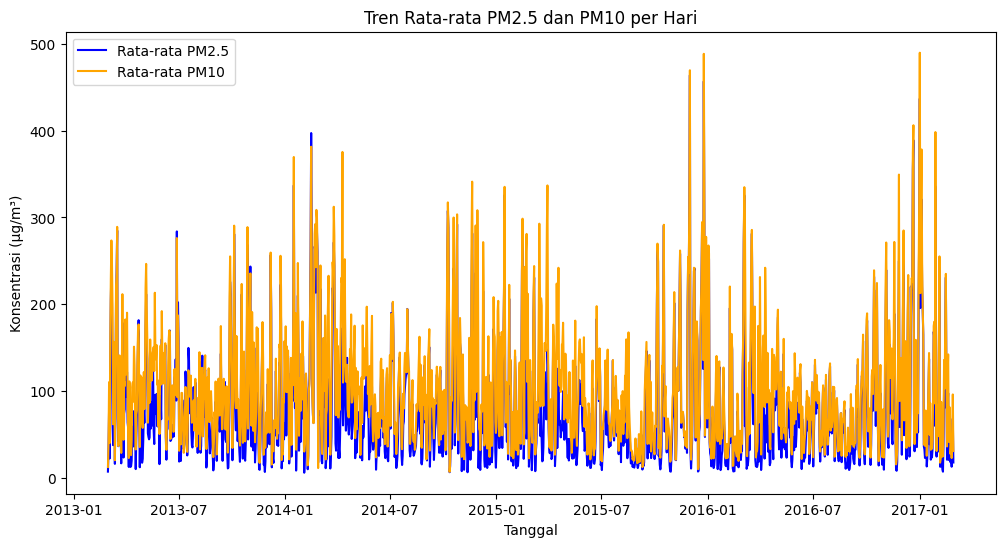

In [ ]:
# Mengubah kolom tanggal menjadi tipe datetime
all_stations_df['date'] = pd.to_datetime(all_stations_df[['year', 'month', 'day']])

# Menghitung rata-rata PM2.5 dan PM10 per hari
daily_avg = all_stations_df.groupby('date')[['PM2.5', 'PM10']].mean().reset_index()

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(daily_avg['date'], daily_avg['PM2.5'], label='Rata-rata PM2.5', color='blue')
plt.plot(daily_avg['date'], daily_avg['PM10'], label='Rata-rata PM10', color='orange')
plt.title('Tren Rata-rata PM2.5 dan PM10 per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi (µg/m³)')
plt.legend()
plt.show()

**Visualisasi ini menunjukkan hubungan antara PM2.5 dan curah hujan (RAIN).**

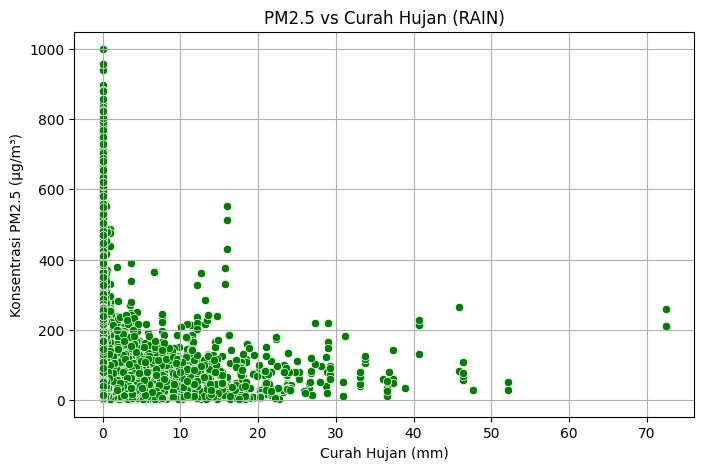

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=all_stations_df, x='RAIN', y='PM2.5', color='green')
plt.title('PM2.5 vs Curah Hujan (RAIN)')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.grid()
plt.show()

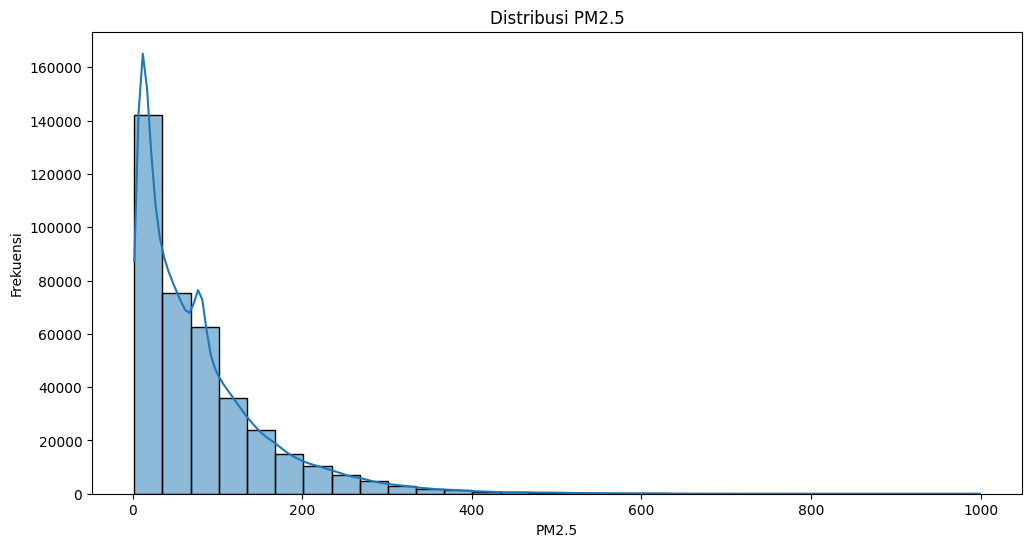

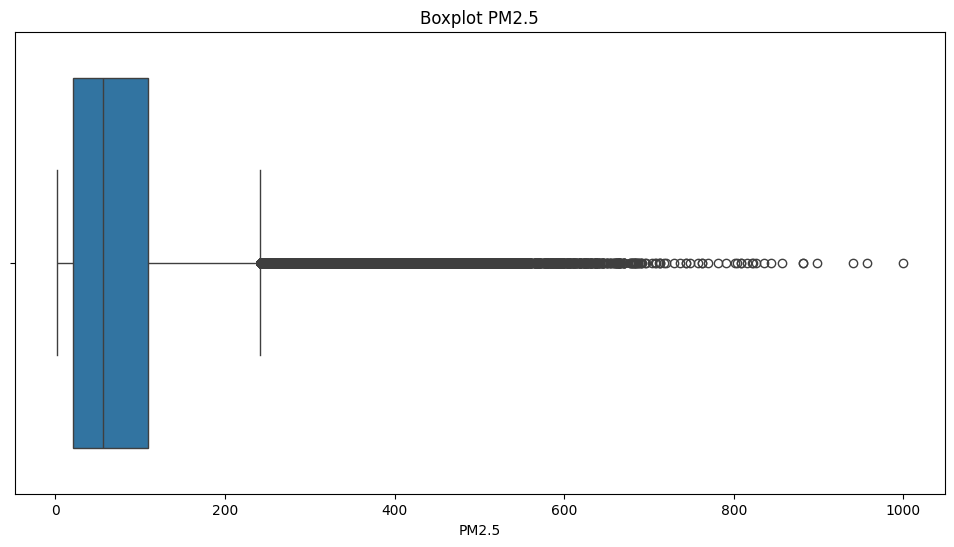

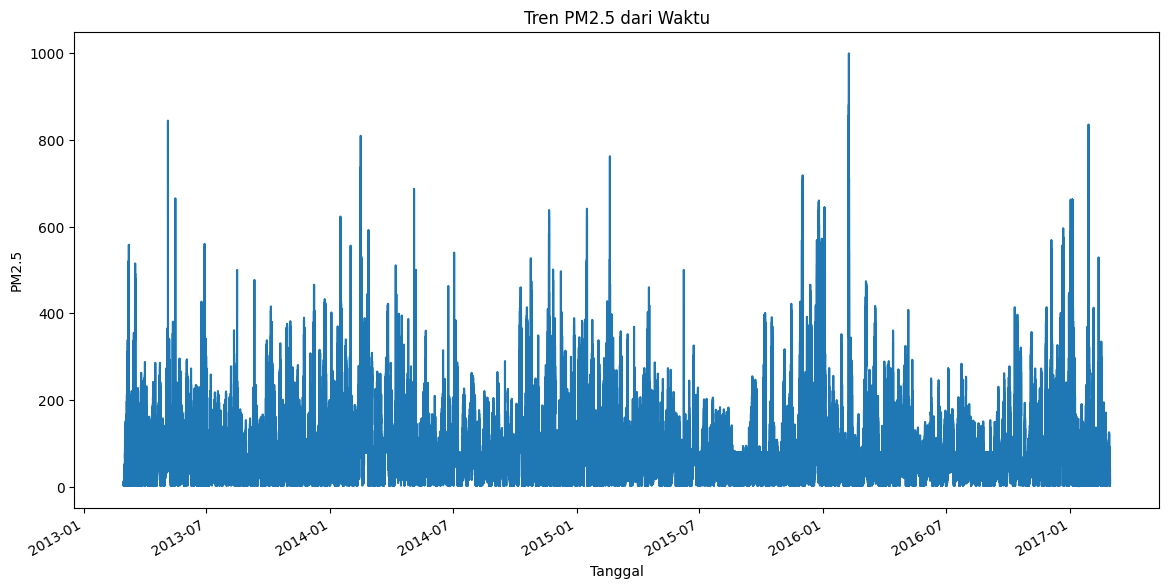

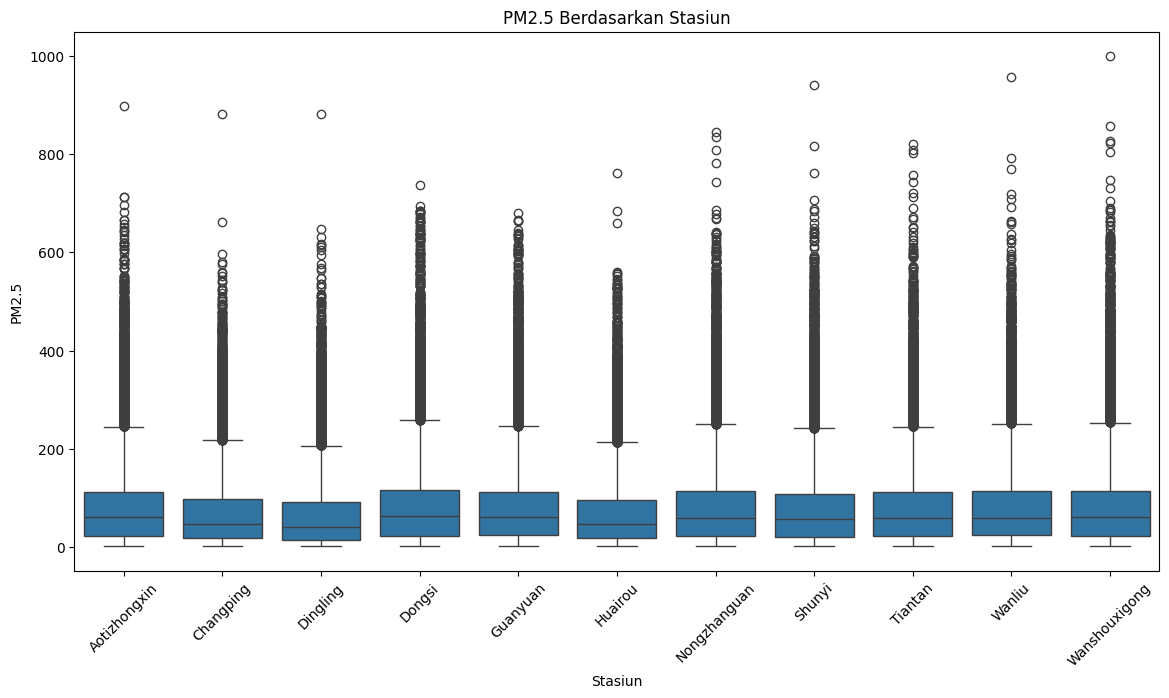

In [ ]:
# Histogram untuk PM2.5
plt.figure(figsize=(12, 6))
sns.histplot(all_stations_df['PM2.5'], bins=30, kde=True)
plt.title('Distribusi PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk PM2.5
plt.figure(figsize=(12, 6))
sns.boxplot(x=all_stations_df['PM2.5'])
plt.title('Boxplot PM2.5')
plt.xlabel('PM2.5')
plt.show()

# Membuat kolom datetime
all_stations_df['datetime'] = pd.to_datetime(all_stations_df[['year', 'month', 'day', 'hour']])

# Mengatur index ke kolom datetime
all_stations_df.set_index('datetime', inplace=True)

# Plot PM2.5 dari waktu
plt.figure(figsize=(14, 7))
all_stations_df['PM2.5'].plot()
plt.title('Tren PM2.5 dari Waktu')
plt.xlabel('Tanggal')
plt.ylabel('PM2.5')
plt.show()

# Boxplot PM2.5 berdasarkan stasiun
plt.figure(figsize=(14, 7))
sns.boxplot(x='station', y='PM2.5', data=all_stations_df)
plt.xticks(rotation=45)
plt.title('PM2.5 Berdasarkan Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('PM2.5')
plt.show()

## Conclusion

Dari analisis yang dilakukan terhadap dataset kualitas udara di berbagai stasiun, beberapa wawasan penting dapat diambil:

- **Perbedaan Kualitas Udara Antara Musim:**

  Analisis menunjukkan bahwa terdapat perbedaan signifikan dalam konsentrasi PM2.5 dan PM10 antara musim panas dan musim dingin. Musim dingin cenderung menunjukkan konsentrasi polusi udara yang lebih tinggi, kemungkinan akibat faktor seperti pembakaran bahan bakar untuk pemanasan dan kondisi meteorologi yang menghambat pencampuran udara.

- **Pengaruh Curah Hujan Terhadap Polusi Udara:**

  Hasil analisis menunjukkan bahwa curah hujan memiliki pengaruh negatif terhadap tingkat polusi udara, khususnya pada PM2.5 dan PM10. Ketika curah hujan meningkat, tingkat konsentrasi polutan cenderung menurun, mengindikasikan bahwa hujan dapat membantu membersihkan partikel-partikel polutan dari udara.

- **Pengaruh Arah dan Kecepatan Angin:**

  Analisis mengenai arah angin (wd) dan kecepatan angin (WSPM) menunjukkan adanya hubungan yang kompleks dengan tingkat polutan PM2.5. Polutan lebih cenderung terdispersi dengan kecepatan angin yang lebih tinggi, sementara arah angin dapat mempengaruhi konsentrasi polutan tergantung pada sumber emisi yang ada di sekitar stasiun pengukuran.